In [1]:
import pandas as pd
import numpy as np

In [2]:
# Membaca data dari file CSV menggunakan pandas
def load_data(filename):
    data = pd.read_csv(filename, delimiter=';')
    features = data.iloc[:, :-1].values  # Semua kolom kecuali yang terakhir sebagai fitur
    labels = data.iloc[:, -1].values     # Kolom terakhir sebagai label
    return features, labels

In [3]:
# Fungsi untuk menghitung jarak Euclidean antara dua titik
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [4]:
# Fungsi KNN tanpa Counter
def knn_classify(features, labels, test_point, k=3):
    # Menghitung jarak setiap titik di data latih ke titik uji
    distances = np.array([euclidean_distance(feature, test_point) for feature in features])
    # Mengurutkan berdasarkan jarak terdekat dan memilih K terdekat
    nearest_indices = distances.argsort()[:k]
    nearest_labels = labels[nearest_indices]
    
    # Menemukan kelas yang paling sering muncul di antara tetangga terdekat
    unique_labels, counts = np.unique(nearest_labels, return_counts=True)
    most_common = unique_labels[np.argmax(counts)]
    return most_common

In [9]:
# Contoh penggunaan
filename = 'data iris 1.csv'  # Ganti dengan nama file CSV Anda
features, labels = load_data(filename)

In [7]:
# Tentukan titik uji
test_point = np.array([5.1, 3.5, 1.4, 0.2])  # Contoh titik uji

In [10]:
# Prediksi kelas dengan K=3
predicted_class = knn_classify(features, labels, test_point, k=3)
print(f"Kelas yang diprediksi untuk titik uji {test_point} adalah: {predicted_class}")

Kelas yang diprediksi untuk titik uji [5.1 3.5 1.4 0.2] adalah: Iris-setosa


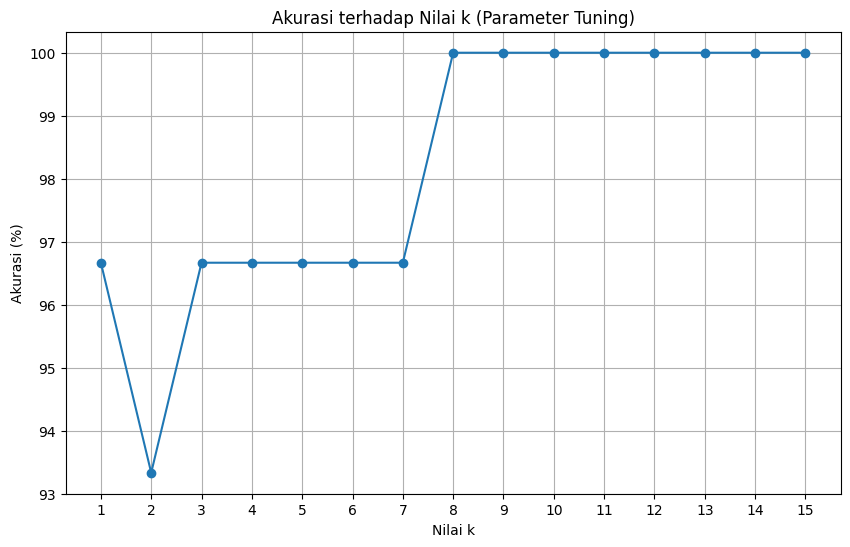

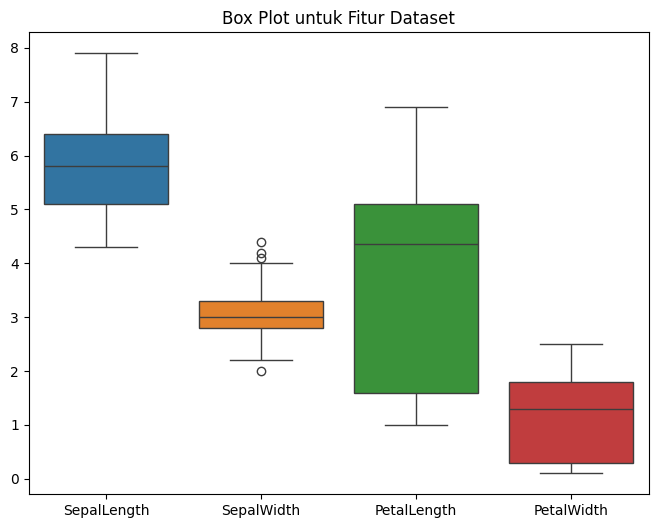

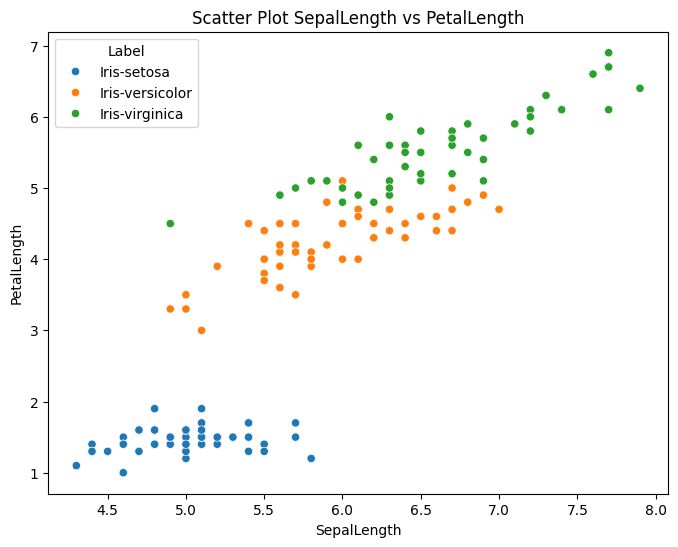

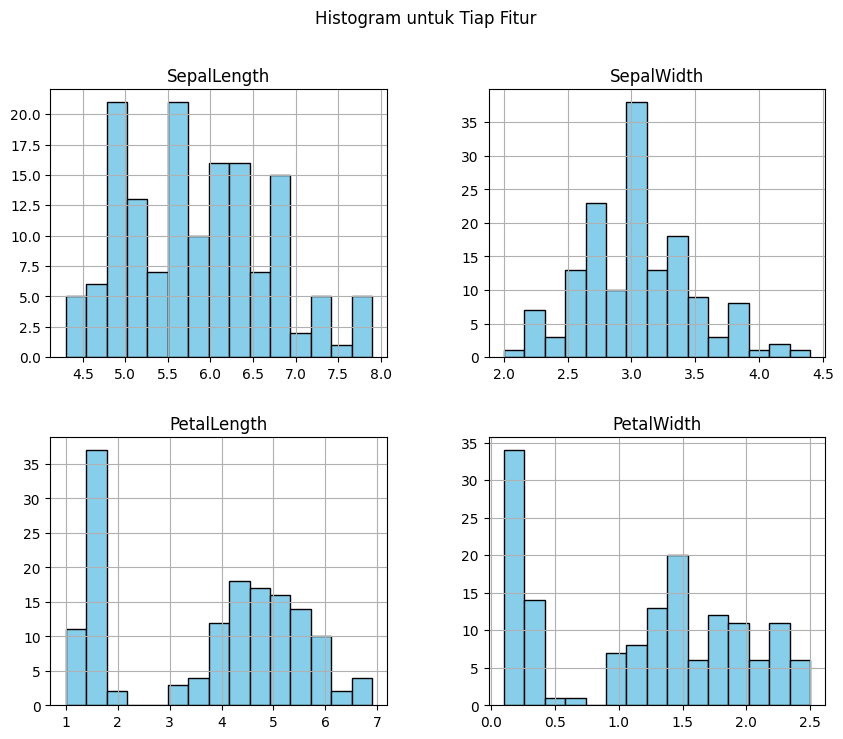

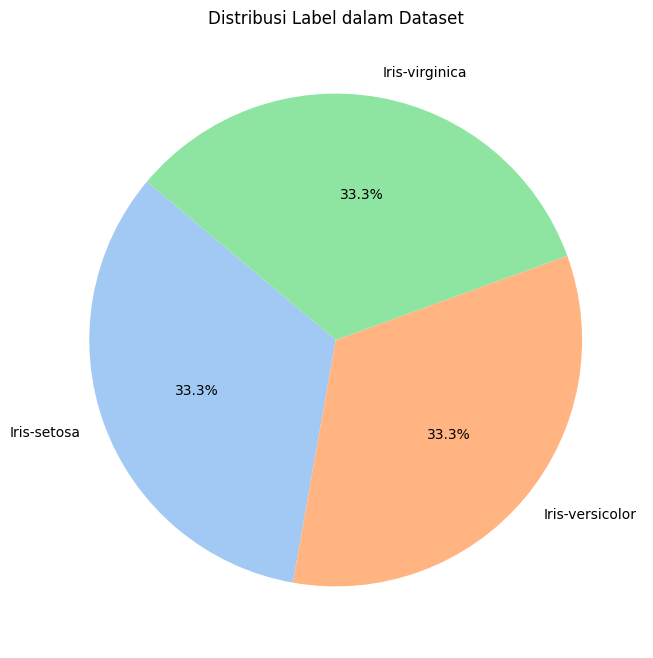

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk memuat data
def load_data(filename):
    data = pd.read_csv(filename, delimiter=';')
    features = data.iloc[:, :-1].values
    labels = data.iloc[:, -1].values
    return features, labels

# Fungsi untuk membagi data secara random
def split_data(features, labels, test_size=0.2):
    data = list(zip(features, labels))
    np.random.shuffle(data)
    features, labels = zip(*data)
    split_index = int(len(features) * (1 - test_size))
    return (
        np.array(features[:split_index]), np.array(labels[:split_index]),
        np.array(features[split_index:]), np.array(labels[split_index:])
    )

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Fungsi KNN
def knn_classify(features, labels, test_point, k=5):
    distances = np.array([euclidean_distance(feature, test_point) for feature in features])
    nearest_indices = distances.argsort()[:k]
    nearest_labels = labels[nearest_indices]
    unique_labels, counts = np.unique(nearest_labels, return_counts=True)
    return unique_labels[np.argmax(counts)]

# Fungsi untuk menghitung akurasi
def calculate_accuracy(test_features, test_labels, train_features, train_labels, k):
    correct_predictions = 0
    for test_point, true_label in zip(test_features, test_labels):
        predicted_label = knn_classify(train_features, train_labels, test_point, k)
        if predicted_label == true_label:
            correct_predictions += 1
    return (correct_predictions / len(test_labels)) * 100

# Load data
filename = 'data iris.csv'
features, labels = load_data(filename)
train_features, train_labels, test_features, test_labels = split_data(features, labels)

# Mencoba beberapa nilai k untuk tuning parameter
k_values = range(1, 16)
accuracies = [calculate_accuracy(test_features, test_labels, train_features, train_labels, k) for k in k_values]

# Visualisasi tuning k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Akurasi terhadap Nilai k (Parameter Tuning)')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi (%)')
plt.xticks(k_values)
plt.grid()
plt.show()

# Visualisasi dataset
df = pd.DataFrame(features, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
df['Label'] = labels

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title('Box Plot untuk Fitur Dataset')
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLength', y='PetalLength', hue='Label', data=df)
plt.title('Scatter Plot SepalLength vs PetalLength')
plt.show()

# Histogram
df.iloc[:, :-1].hist(bins=15, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histogram untuk Tiap Fitur')
plt.show()

# Pie Chart
label_counts = df['Label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribusi Label dalam Dataset')
plt.show()
